In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from Perceptron import Perceptron

sns.set()
%matplotlib inline

# Load iris dataset
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Check how many species and how many samples each spieces has.
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

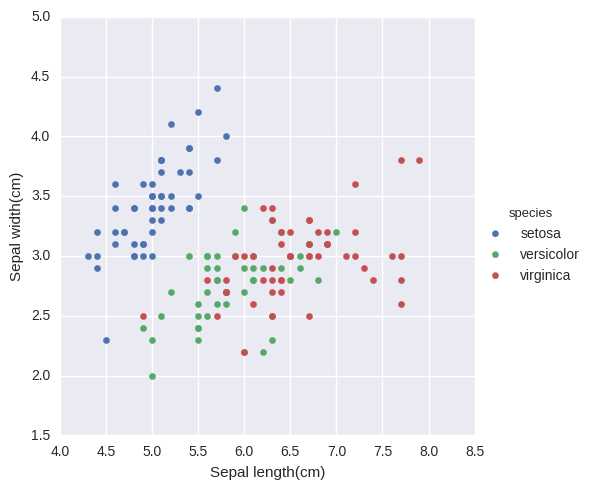

In [5]:
# Plot the whole data
sns.FacetGrid(iris, hue='species', size=5).map(plt.scatter, "sepal_length", "sepal_width").add_legend()
plt.xlabel('Sepal length(cm)')
plt.ylabel('Sepal width(cm)')
plt.show()


In the dataset the first 50 samples corresponds to setosa,the next 50 to versicolor and the next 50 to virginica species.
 So, let's work with setosa and versicolor samples.


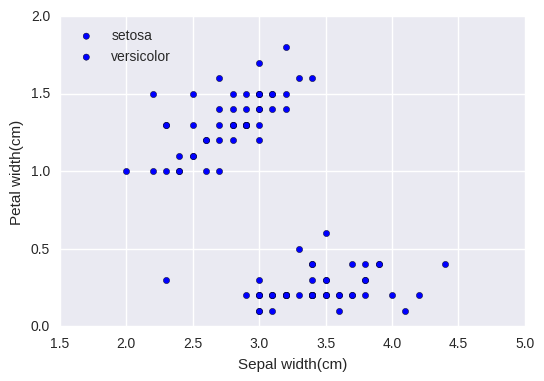

In [6]:
# Extract the data (50 setosa, 50 versicolor) regarding the labels (column 4)
y = iris.iloc[:100, 4].values

# Change the labels from species to 1 (versicolor) and -1(setosa)
y = np.where(y == 'setosa', -1, 1)

# Extract the sepal width and petal width features (columns 1 and 3)
X = iris.iloc[:100, [1, 3]].values
plt.scatter(X[:50, 0], X[:50, 1], label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], label='versicolor')
plt.xlabel('Sepal width(cm)')
plt.ylabel('Petal width(cm)')
plt.legend(loc='upper left')
plt.show()

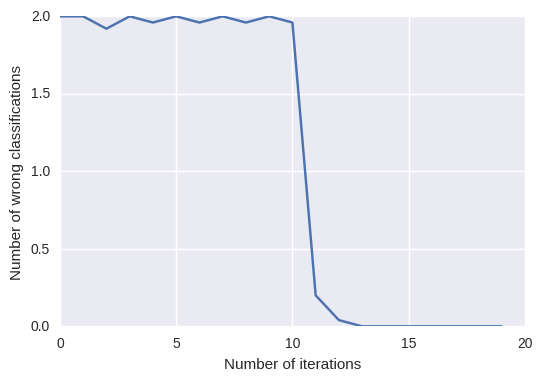

In [8]:
# Train our perceptron.
per = Perceptron(nb_iterations=20, eta=0.1)
per.fit(X,y)
# Plot the errors
plt.plot(per.errors)
plt.xlabel('Number of iterations')
plt.ylabel('Number of wrong classifications')
plt.show()

We can see that after 11-12 iterations the network was able to classify the training samples correctly.

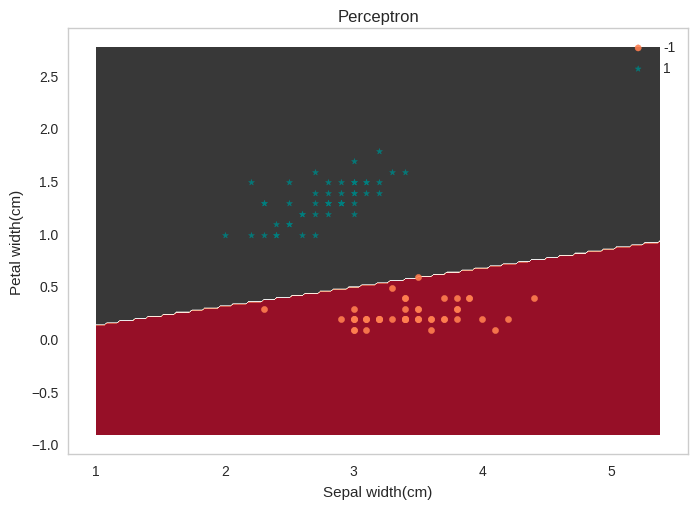

In [87]:
# Create x,y limits and a meshgrid.
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Step size in the mesh.
h_step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h_step), np.arange(y_min, y_max, h_step))
# Plot the decision boundary (predict).
# Assign a color to each point in the mesh.
fig, ax = plt.subplots()
Z = per.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Make contourf plot
ax.contourf(xx, yy, Z, cmap='RdGy')
# Plot the training points
colors = ('#FF7F50', '#008080')
markers = ('o','*')
# unique gives us (1 and -1, hence the unique values of y)
for idx, el in enumerate(np.unique(y)):
    ax.scatter(X[y == el , 0], X[y == el, 1],marker=markers[idx], color=colors[idx], alpha=0.9, label=el)

ax.set_title('Perceptron')
ax.set_xlabel('Sepal width(cm)')
ax.set_ylabel('Petal width(cm)')
plt.legend()
ax.grid(b=False)
plt.show()

We can see that the perceptron (in that case because generally, convergence is a problem of the perceptron algoritmh) was able to learn correctly which the decision boundary is.